# Assignment #1: Linear Regression

Predict the fuel consumption of different cards based on a set of car features from the dataset [Auto MPG](http://archive.ics.uci.edu/dataset/9/auto+mpg). Pay attention to potential categorical attributes and missing values. Improve by transforming target variable or removing attributes/instances.

## Write the code to fit multiple linear regression

In [444]:
import numpy as np


class CustomLinearRegression:
  def __init__(self):
    self.coefficients = None
    self.residuals = None
    self.standardized_residuals = None
    self.leverage = None
    self.train_pred = None


  def fit(self, X, y):
    """
    Train the linear regression model by estimating the values of the regression
    coefficients and calculating the residuals on the training data.
    """
    # Transform the features into a matrix
    rows, cols = X.shape
    X_mat = np.ones((rows, cols + 1))
    X_mat[:, 1:] = X.values
    X_mat_T = X_mat.T
    # Transform the labels into a vector
    y_vec = y["mpg"].values

    # Estimate the regression coefficients
    self.coefficients = np.linalg.inv(X_mat_T.dot(X_mat)).dot(X_mat_T).dot(y_vec)

    # Calculate the residuals (y-y_pred) and the leverage(X (X^T X)^-1 X^T) of the model
    self.train_pred = self.predict(X)
    self.residuals = np.subtract(y_vec, self.train_pred)
    self.leverage = np.diag(X_mat.dot(np.linalg.inv(X_mat_T.dot(X_mat))).dot(X_mat_T))

    # Calculate standardized residuals
    residual_variance = np.divide(np.sum(np.square(self.residuals)), (rows - cols + 1))
    self.standardized_residuals = np.divide(self.residuals, np.sqrt(residual_variance))


  def predict(self, X):
    """
    Function that makes predictions based on the coefficients calculated in the
    training process of the linear regression model.
    """
    # Check if the model is already trained (coefficients are calculated)
    if self.coefficients is None:
      raise ValueError("Model has not been trained yet. Call the function 'fit()' first.")

    # Transform the features into a matrix
    rows, cols = X.shape
    X_mat = np.ones((rows, cols + 1))
    X_mat[:, 1:] = X.values

    # Calculate the predictions
    return X_mat.dot(self.coefficients)


  def evaluation(self, y_true, y_pred):
    """
    Evaluate the model by calculating the following evaluation metrices:
    1. Mean Squared Error (MSE) - average of squared differences between predicted
    and actual values.
    2. Mean Absolute Error (MAE) - average of absolute differences between predicted
    and actual values.
    3. Residual Standard Error (RSE) - square root of the MSE. How much the target variable
    deviates from the linear line.
    4. R-Squared Score (R^2) - proportion of the variance in the dependent variable that is
    predicted from the independent variables.
    """
    # Calculate the MSE
    mse = np.square(np.subtract(y_true, y_pred)).mean()
    # Calculate the MAE
    mae = np.abs(np.subtract(y_true, y_pred)).mean()
    # Calculate the RSE
    rse = np.sqrt(mse)
    # Calculate the R^2
    rss = np.square(np.subtract(y_true, y_pred)).sum()
    tss = np.square(np.subtract(y_true, y_true.mean())).sum()
    r2_score = 1 - np.divide(rss, tss)

    print("Linear Regression Evaluation Results:")
    print("Mean Squared Error (MSE): ", mse)
    print("Mean Absolute Error (MAE): ", mae)
    print("Residual Standard Error (RSE): ", rse)
    print("R-Squared Score (R^2): ", r2_score)

    return mse, mae, rse, r2_score

## Download the dataset

In [445]:
# Install the ucimlrepo package
!pip install ucimlrepo

In [446]:
# Download the dataset
from ucimlrepo import fetch_ucirepo

# Fetch the dataset
auto_mpg = fetch_ucirepo(id=9)

# Save data as pandas dataframes
X = auto_mpg.data.features
y = auto_mpg.data.targets

# Print information about the dataset
print("Metadata: ", auto_mpg.metadata)
print("Variable information: ", auto_mpg.variables)

Metadata:  {'uci_id': 9, 'name': 'Auto MPG', 'repository_url': 'https://archive.ics.uci.edu/dataset/9/auto+mpg', 'data_url': 'https://archive.ics.uci.edu/static/public/9/data.csv', 'abstract': 'Revised from CMU StatLib library, data concerns city-cycle fuel consumption', 'area': 'Other', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 398, 'num_features': 7, 'feature_types': ['Real', 'Categorical', 'Integer'], 'demographics': [], 'target_col': ['mpg'], 'index_col': ['car_name'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1993, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5859H', 'creators': ['R. Quinlan'], 'intro_paper': None, 'additional_info': {'summary': 'This dataset is a slightly modified version of the dataset provided in the StatLib library.  In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unknown va

Aready from the information here we can see that for the column **horsepower** we have missing values. But we will take care of it later. Let's first take a look at the data.

In [447]:
y

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0
...,...
393,27.0
394,44.0
395,32.0
396,28.0


In [448]:
X

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin
0,307.0,8,130.0,3504,12.0,70,1
1,350.0,8,165.0,3693,11.5,70,1
2,318.0,8,150.0,3436,11.0,70,1
3,304.0,8,150.0,3433,12.0,70,1
4,302.0,8,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...
393,140.0,4,86.0,2790,15.6,82,1
394,97.0,4,52.0,2130,24.6,82,2
395,135.0,4,84.0,2295,11.6,82,1
396,120.0,4,79.0,2625,18.6,82,1


As we can see the attribute **car_name**
 is already removed, when fetching the data, since it is not specified as a feature, but an ID.
Now let's remove the attribute **cylinders**.

In [449]:
# Remove the attribute cylinders
import pandas as pd

# Use the pandas library to drop the column
X = X.drop(columns=["cylinders"])
X

,displacement,horsepower,weight,acceleration,model_year,origin
0,307.0,130.0,3504,12.0,70,1
1,350.0,165.0,3693,11.5,70,1
2,318.0,150.0,3436,11.0,70,1
3,304.0,150.0,3433,12.0,70,1
4,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...
393,140.0,86.0,2790,15.6,82,1
394,97.0,52.0,2130,24.6,82,2
395,135.0,84.0,2295,11.6,82,1
396,120.0,79.0,2625,18.6,82,1


Check if there are any duplicate rows based on all columns


In [450]:
X[X.duplicated()]

,displacement,horsepower,weight,acceleration,model_year,origin


In [451]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   displacement  398 non-null    float64
 1   horsepower    392 non-null    float64
 2   weight        398 non-null    int64  
 3   acceleration  398 non-null    float64
 4   model_year    398 non-null    int64  
 5   origin        398 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 18.8 KB


In [452]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     398 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


As we can see each column is a number, which is good since we don't need to encode the data, but we see again that the column **horsepower** has missing values. Let's take care of that.

In [453]:
# Find the values missing in each column
missing_values_index = X[X.isnull().any(axis=1)].index
X.iloc[missing_values_index]

,displacement,horsepower,weight,acceleration,model_year,origin
32,98.0,NaN,2046,19.0,71,1
126,200.0,NaN,2875,17.0,74,1
330,85.0,NaN,1835,17.3,80,2
336,140.0,NaN,2905,14.3,80,1
354,100.0,NaN,2320,15.8,81,2
374,151.0,NaN,3035,20.5,82,1


There are only six rows that don't have values for this column. We could just delete the rows using *X.dropna()*, but since we don't have a lot of data anyway it will be better to just impute missing values. We can find the mean of the other values in the column **horsepower** and use it for the value of these 6 rows with missing data.


In [454]:
# Impute missing values using mean of a column
mean_value = X["horsepower"].mean().round(1)
X = X.fillna(mean_value)
X.iloc[missing_values_index]

,displacement,horsepower,weight,acceleration,model_year,origin
32,98.0,104.5,2046,19.0,71,1
126,200.0,104.5,2875,17.0,74,1
330,85.0,104.5,1835,17.3,80,2
336,140.0,104.5,2905,14.3,80,1
354,100.0,104.5,2320,15.8,81,2
374,151.0,104.5,3035,20.5,82,1


In [455]:
# Check that we actually fixed the problem without changing the data size
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   displacement  398 non-null    float64
 1   horsepower    398 non-null    float64
 2   weight        398 non-null    int64  
 3   acceleration  398 non-null    float64
 4   model_year    398 non-null    int64  
 5   origin        398 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 18.8 KB


Of course we will try to train and test the model on only 392 rows, which means that we will delete the 6 rows, which contain missing data. This way we can see, which option (drop or imputation with mean) will give better performance.

In [456]:
# Fix the problem by deleting the rows with missing data
X_smaller = X.drop(index=missing_values_index)
y_smaller = y.drop(index=missing_values_index)

In [457]:
X_smaller.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   displacement  392 non-null    float64
 1   horsepower    392 non-null    float64
 2   weight        392 non-null    int64  
 3   acceleration  392 non-null    float64
 4   model_year    392 non-null    int64  
 5   origin        392 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 21.4 KB


In [458]:
y_smaller.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     392 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


## Split dataset

We will first split the dataset with the imputed mean on the rows of the column **horsepower**.

In [459]:
# Split the data into train and test using the SciKit-learn library
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("---Features sizes---")
print(f"Splitted data: ({len(X_train)}, {len(X_test)})")
print("Whole data: ", len(X))
print("---Labels sizes---")
print(f"Splitted data: ({len(y_train)}, {len(y_test)})")
print("Whole data:", len(y))

---Features sizes---
Splitted data: (318, 80)
Whole data:  398
---Labels sizes---
Splitted data: (318, 80)
Whole data: 398


Now let's do that for the dataset with dropped rows

In [460]:
# Split the smaller data into train and test using the SciKit-learn library
X_smaller_train, X_smaller_test, y_smaller_train, y_smaller_test = train_test_split(X_smaller, y_smaller, test_size=0.2, random_state=42)

print("---Features sizes---")
print(f"Splitted data: ({len(X_smaller_train)}, {len(X_smaller_test)})")
print("Whole data: ", len(X_smaller))
print("---Labels sizes---")
print(f"Splitted data: ({len(y_smaller_train)}, {len(y_smaller_test)})")
print("Whole data:", len(y_smaller))

---Features sizes---
Splitted data: (313, 79)
Whole data:  392
---Labels sizes---
Splitted data: (313, 79)
Whole data: 392


## Test created linear regression and compare it with linear regression from SciKit-learn

First we will make predictions on our own model using the longer dataset

In [461]:
custom_regression = CustomLinearRegression()
custom_regression.fit(X_train, y_train)

In [462]:
y_pred = custom_regression.predict(X_test)
y_pred

array([32.86813999, 29.55344052, 21.35012245, 16.90353967, 12.58747749,
       27.21279902, 27.83728621,  9.62107583, 17.10125816, 21.98998299,
       12.75943163, 36.15743229, 25.25060183, 13.82297959, 23.88880597,
        6.29196361, 29.5499268 , 23.75378412, 16.25102499, 36.31277019,
       23.64505544, 19.0509529 , 28.75557624, 28.80299944, 15.08724929,
       34.71420261, 25.50432626, 24.84038921, 21.89174895,  8.63913158,
       28.352749  , 34.86836598, 20.54040368, 26.03140332, 34.26610554,
       11.98865972, 23.15655339, 21.91139612, 12.40548464, 26.76991907,
       26.42594952, 27.43402971, 20.10309661,  7.34915264, 24.46044206,
       34.89468809, 26.69030768, 24.17074506, 22.53011891, 27.58043973,
       22.59535132, 33.67544924, 32.6325923 , 10.88352243, 27.88346063,
        9.88836227, 19.76828247, 29.7634858 , 23.10731016, 20.45600188,
       16.25946465, 32.07802914, 23.93754079, 20.44003403, 20.99939043,
       25.45848376, 25.01147476, 32.42070784, 28.13124336, 12.79

In [463]:
y_test["mpg"].values

array([33. , 28. , 19. , 13. , 14. , 27. , 24. , 13. , 17. , 21. , 15. ,
       38. , 26. , 15. , 25. , 12. , 31. , 17. , 16. , 31. , 22. , 22. ,
       22. , 33.5, 18. , 44. , 26. , 24.5, 18.1, 12. , 27. , 36. , 23. ,
       24. , 37.2, 16. , 21. , 19.2, 16. , 29. , 26.8, 27. , 18. , 10. ,
       23. , 36. , 26. , 25. , 25. , 25. , 22. , 34.1, 32.4, 13. , 23.5,
       14. , 18.5, 29.8, 28. , 19. , 11. , 33. , 23. , 21. , 23. , 25. ,
       23.8, 34.4, 24.5, 13. , 34.7, 14. , 15. , 18. , 25. , 19.9, 17.5,
       28. , 29. , 17. ])

Now using the predicted values and the labels we can calculate the evaluation metrics.

In [464]:
mse, mae, rse, r2_score = custom_regression.evaluation(y_test["mpg"].values, y_pred)

Linear Regression Evaluation Results:
Mean Squared Error (MSE):  8.318586145568883
Mean Absolute Error (MAE):  2.2569222723349576
Residual Standard Error (RSE):  2.8841959270425583
R-Squared Score (R^2):  0.8452829392204523


Let's do the same procedures for the smaller dataset.

In [465]:
# Train the model
custom_regression_smaller = CustomLinearRegression()
custom_regression_smaller.fit(X_smaller_train, y_smaller_train)

In [466]:
# Make the predictions
y_smaller_pred = custom_regression_smaller.predict(X_smaller_test)
y_smaller_pred

array([25.86668653, 25.9403129 , 34.53879248, 25.00602459, 28.22593501,
       30.55481371,  8.31815868, 30.71267948, 20.56381278, 28.82483909,
       12.47737667, 25.61550356, 16.79518583, 29.67091592, 22.17080665,
       29.2258651 , 20.56037425, 33.30763375, 26.57805587, 29.83519662,
       19.11793712, 34.53344386, 35.51798842, 15.16429217, 28.58105736,
       25.66065848, 20.89213164, 16.18313487, 28.7113234 , 23.96863704,
       13.38865578, 23.42072065, 21.28498668, 31.73424361, 12.00684982,
       36.25225484, 11.10581717, 24.43298093, 11.70643078,  7.1564887 ,
       13.09160173, 27.62684973, 34.72567367, 26.40133954, 11.96990393,
        9.37012715, 17.48078641, 31.42885902, 24.16643887, 30.27309927,
       11.92174333, 26.43609123, 22.95868974, 35.01935223, 28.28203486,
       17.61033242, 20.78835746, 22.70611152, 22.71168894, 25.91762844,
        7.97360132, 22.67697447, 26.11062757, 23.21226054, 29.7486487 ,
       28.65649085, 25.53959479, 29.49671405, 22.26025329,  9.70

In [467]:
# Show the labels
y_smaller_test["mpg"].values

array([26. , 21.6, 36.1, 26. , 27. , 28. , 13. , 26. , 19. , 29. , 15. ,
       19. , 16.9, 29. , 16.2, 28. , 20. , 32.4, 27.4, 35. , 22. , 44. ,
       34.1, 18. , 26. , 26. , 21. , 16. , 26. , 22. , 15. , 19.4, 19.2,
       31.6, 13. , 38. , 14. , 25. , 13. , 10. , 13. , 24. , 36. , 26. ,
       14. , 13. , 19. , 37.3, 21. , 29. , 14. , 24. , 28. , 36. , 22. ,
       16. , 20. , 20. , 25. , 25. , 12. , 22.5, 26.8, 23. , 21.1, 25. ,
       25.1, 29. , 19.9, 15. , 22. , 13. , 22. , 18. , 17.6, 28. , 15. ,
       16. , 27. ])

In [468]:
# Calculate the evaluation metrics
mse_smaller, mae_smaller, rse_smaller, r2_score_smaller = custom_regression_smaller.evaluation(y_smaller_test["mpg"].values, y_smaller_pred)

Linear Regression Evaluation Results:
Mean Squared Error (MSE):  10.89628493804231
Mean Absolute Error (MAE):  2.4366213618969046
Residual Standard Error (RSE):  3.300952125984609
R-Squared Score (R^2):  0.7865172330254304


We will repeat this evaluation of both datasets, but this time using the linear regression implemented in SciKit-learn.

In [469]:
from sklearn.linear_model import LinearRegression

# Train the bigger model
regression_sklearn = LinearRegression()
regression_sklearn.fit(X_train, y_train)

LinearRegression()

In [470]:
# Make predictions
y_pred_sklearn = regression_sklearn.predict(X_test).reshape(-1)
y_pred_sklearn

array([32.86813999, 29.55344052, 21.35012245, 16.90353967, 12.58747749,
       27.21279902, 27.83728621,  9.62107583, 17.10125816, 21.98998299,
       12.75943163, 36.15743229, 25.25060183, 13.82297959, 23.88880597,
        6.29196361, 29.5499268 , 23.75378412, 16.25102499, 36.31277019,
       23.64505544, 19.0509529 , 28.75557624, 28.80299944, 15.08724929,
       34.71420261, 25.50432626, 24.84038921, 21.89174895,  8.63913158,
       28.352749  , 34.86836598, 20.54040368, 26.03140332, 34.26610554,
       11.98865972, 23.15655339, 21.91139612, 12.40548464, 26.76991907,
       26.42594952, 27.43402971, 20.10309661,  7.34915264, 24.46044206,
       34.89468809, 26.69030768, 24.17074506, 22.53011891, 27.58043973,
       22.59535132, 33.67544924, 32.6325923 , 10.88352243, 27.88346063,
        9.88836227, 19.76828247, 29.7634858 , 23.10731016, 20.45600188,
       16.25946465, 32.07802914, 23.93754079, 20.44003403, 20.99939043,
       25.45848376, 25.01147476, 32.42070784, 28.13124336, 12.79

In [471]:
y_test["mpg"].values

array([33. , 28. , 19. , 13. , 14. , 27. , 24. , 13. , 17. , 21. , 15. ,
       38. , 26. , 15. , 25. , 12. , 31. , 17. , 16. , 31. , 22. , 22. ,
       22. , 33.5, 18. , 44. , 26. , 24.5, 18.1, 12. , 27. , 36. , 23. ,
       24. , 37.2, 16. , 21. , 19.2, 16. , 29. , 26.8, 27. , 18. , 10. ,
       23. , 36. , 26. , 25. , 25. , 25. , 22. , 34.1, 32.4, 13. , 23.5,
       14. , 18.5, 29.8, 28. , 19. , 11. , 33. , 23. , 21. , 23. , 25. ,
       23.8, 34.4, 24.5, 13. , 34.7, 14. , 15. , 18. , 25. , 19.9, 17.5,
       28. , 29. , 17. ])

In [472]:
# Evaluate using the same evaluation function
mse_sklearn, mae_sklearn, rse_sklearn, r2_score_sklearn = custom_regression.evaluation(y_test["mpg"].values, y_pred_sklearn)

Linear Regression Evaluation Results:
Mean Squared Error (MSE):  8.318586145568755
Mean Absolute Error (MAE):  2.256922272334942
Residual Standard Error (RSE):  2.884195927042536
R-Squared Score (R^2):  0.8452829392204547


In [473]:
# Train the smaller model
regression_smaller_sklearn = LinearRegression()
regression_smaller_sklearn.fit(X_smaller_train, y_smaller_train)

LinearRegression()

In [474]:
# Make predictions
y_pred_smaller_sklearn = regression_smaller_sklearn.predict(X_smaller_test).reshape(-1)
y_pred_smaller_sklearn

array([25.86668653, 25.9403129 , 34.53879248, 25.00602459, 28.22593501,
       30.55481371,  8.31815868, 30.71267948, 20.56381278, 28.82483909,
       12.47737667, 25.61550356, 16.79518583, 29.67091592, 22.17080665,
       29.2258651 , 20.56037425, 33.30763375, 26.57805587, 29.83519662,
       19.11793712, 34.53344386, 35.51798842, 15.16429217, 28.58105736,
       25.66065848, 20.89213164, 16.18313487, 28.7113234 , 23.96863704,
       13.38865578, 23.42072065, 21.28498668, 31.73424361, 12.00684982,
       36.25225484, 11.10581717, 24.43298093, 11.70643078,  7.1564887 ,
       13.09160173, 27.62684973, 34.72567367, 26.40133954, 11.96990393,
        9.37012715, 17.48078641, 31.42885902, 24.16643887, 30.27309927,
       11.92174333, 26.43609123, 22.95868974, 35.01935223, 28.28203486,
       17.61033242, 20.78835746, 22.70611152, 22.71168894, 25.91762844,
        7.97360132, 22.67697447, 26.11062757, 23.21226054, 29.7486487 ,
       28.65649085, 25.53959479, 29.49671405, 22.2602533 ,  9.70

In [475]:
y_smaller_test["mpg"].values

array([26. , 21.6, 36.1, 26. , 27. , 28. , 13. , 26. , 19. , 29. , 15. ,
       19. , 16.9, 29. , 16.2, 28. , 20. , 32.4, 27.4, 35. , 22. , 44. ,
       34.1, 18. , 26. , 26. , 21. , 16. , 26. , 22. , 15. , 19.4, 19.2,
       31.6, 13. , 38. , 14. , 25. , 13. , 10. , 13. , 24. , 36. , 26. ,
       14. , 13. , 19. , 37.3, 21. , 29. , 14. , 24. , 28. , 36. , 22. ,
       16. , 20. , 20. , 25. , 25. , 12. , 22.5, 26.8, 23. , 21.1, 25. ,
       25.1, 29. , 19.9, 15. , 22. , 13. , 22. , 18. , 17.6, 28. , 15. ,
       16. , 27. ])

In [476]:
# Evaluate using the same evaluation function
mse_smaller_sklearn, mae_smaller_sklearn, rse_smaller_sklearn, r2_score_smaller_sklearn = custom_regression.evaluation(y_smaller_test["mpg"].values, y_pred_smaller_sklearn)

Linear Regression Evaluation Results:
Mean Squared Error (MSE):  10.896284938044372
Mean Absolute Error (MAE):  2.436621361897122
Residual Standard Error (RSE):  3.3009521259849213
R-Squared Score (R^2):  0.78651723302539


Now when we have the evaluated metrics for both models on both datasets lets plot them in order to compare both models.

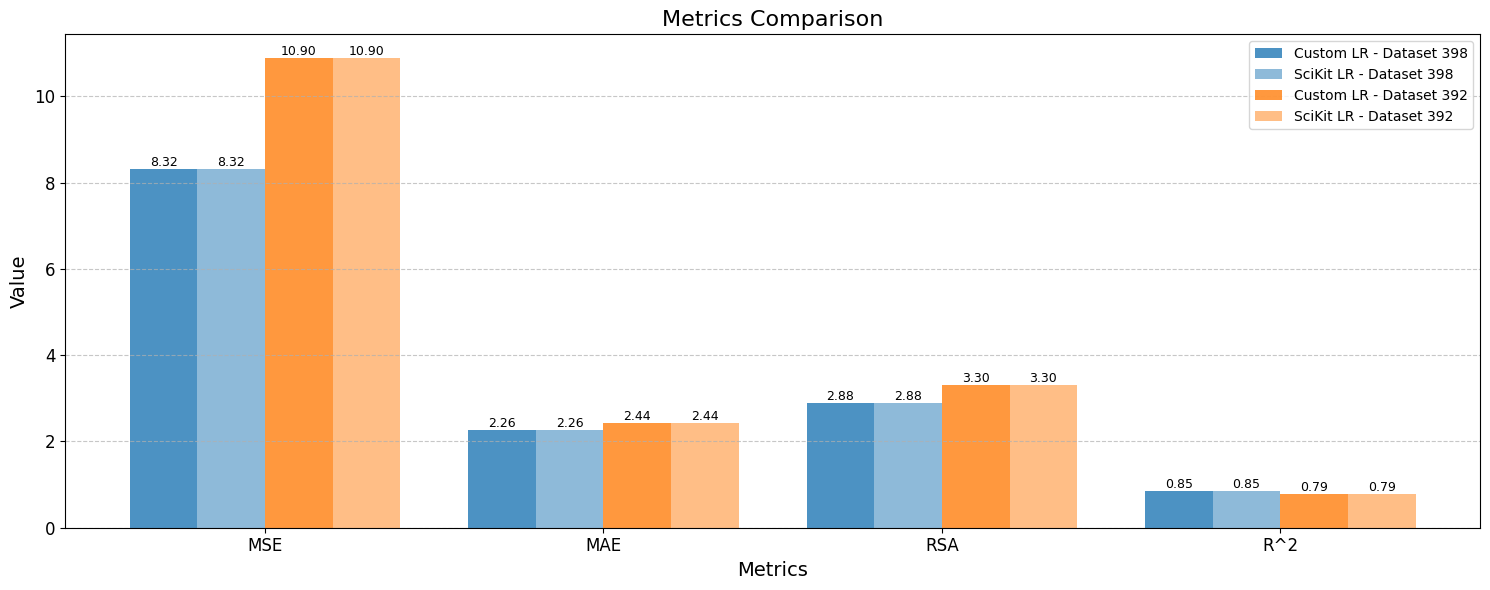

In [477]:
%matplotlib inline
import matplotlib.pyplot as plt

# Create arrays for each metric
MSE = np.array([mse, mse_sklearn, mse_smaller, mse_smaller_sklearn])
MAE = np.array([mae, mae_sklearn, mae_smaller, mae_smaller_sklearn])
RSE = np.array([rse, rse_sklearn, rse_smaller, rse_smaller_sklearn])
R2_SCORE = np.array([r2_score, r2_score_sklearn, r2_score_smaller, r2_score_smaller_sklearn])
metrics = [MSE, MAE, RSE, R2_SCORE]

# Plot the figure
plt.figure(figsize=(15, 6))

# Model and dataset names
datasets = ['Dataset 398', 'Dataset 392']
models = ['Custom LR', 'SciKit LR']
metric_names=['MSE', 'MAE', 'RSA', 'R^2']

# Define legend labels
colors = ['#1f77b4', '#1f77b4', '#ff7f0e', '#ff7f0e']
alphas = [0.8, 0.5, 0.8, 0.5]
labels = [f"{model} - {dataset}" for dataset in datasets for model in models]

# Define positions and spacing
bar_width = 0.2
spacing = 0.6
index = np.arange(len(metrics))

# Iterate over the metrics
for i, metric in enumerate(metrics):
    for j, value in enumerate(metric):
        bar = plt.bar(index[i] + j*bar_width,
                value,
                bar_width,
                color=colors[j],
                label=labels[j] if i == 0 else "",
                alpha=alphas[j])
        height = bar[0].get_height()
        plt.text(bar[0].get_x() + bar[0].get_width()/2,
                 height,
                 f"{value:.2f}",
                 ha='center',
                 va='bottom',
                 fontsize=9)


# Adjustments to the plot
plt.xlabel('Metrics', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.title('Metrics Comparison', fontsize=16)
plt.xticks(index + 1.5*bar_width, metric_names, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='upper right', fontsize=10)
plt.tight_layout()
plt.show()

From the comparison we can see two things:
1. Our implementation of Linear Regression give us the same predictions as the Linear Regression implemented in SciKit-learn for both datasets.
2. As we expected, the bigger dataset allows the model to do better predictions. This means that it is better to impute the missing values instead of dropping the rows in this case.

## Diagnose the created linear regression with diagnostic plots

In [478]:
# Install the statsmodels library
!pip install statsmodels

Since we saw that the dataset X gives better results than X_smaller. We will do diagnose only on it.

In [479]:
labeled_train_data = pd.concat([X_train, y_train], axis=1)
labeled_train_data.head()

,displacement,horsepower,weight,acceleration,model_year,origin,mpg
3,304.0,150.0,3433,12.0,70,1,16.0
18,97.0,88.0,2130,14.5,70,3,27.0
376,91.0,68.0,2025,18.2,82,3,37.0
248,91.0,60.0,1800,16.4,78,3,36.1
177,115.0,95.0,2694,15.0,75,2,23.0


Let's start by training the model on all features to see which one we can get rid of and which are important.

In [480]:
import statsmodels
import statsmodels.formula.api as smf
import pandas as pd

# Train the model
model = smf.ols(formula="mpg ~ displacement + horsepower + weight + acceleration + model_year + origin", data=labeled_train_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     226.6
Date:                Wed, 25 Oct 2023   Prob (F-statistic):          2.37e-110
Time:                        12:27:12   Log-Likelihood:                -841.90
No. Observations:                 318   AIC:                             1698.
Df Residuals:                     311   BIC:                             1724.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -21.2355      5.353     -3.967      0.000     -31.768     -10.702
displacement     0.0116      0.006      1.808      0.072      -0.001       0.024
horsepower      -0.0111      0.015     -0.728      0.467      -0.041       0.019
weight          -0.0068      0.001     -9.317      0.000      -0.008      -0.005
acceleration     0.0771      0.109      0.704      0.482      -0.138       0.293
model_year       0.7978      0.061     13.185      0.000       0.679       0.917
origin           1.2949      0.317      4.083      0.000       0.671       1.919
==============================================================================
Omnibus:                       23.705   Durbin-Watson:                   2.178
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.454
Skew:                           0.521   Prob(JB):                     3.30e-08
Kurtosis:                       4.231   Cond. No.                     8.55e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.55e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Let's prepare the code that we will use to generate diagnostic plots.

In [481]:
# base code
import numpy as np
import seaborn as sns
from statsmodels.tools.tools import maybe_unwrap_results
from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
from typing import Type

style_talk = 'seaborn-talk'    #refer to plt.style.available

class LinearRegDiagnostic():
    """
    Diagnostic plots to identify potential problems in a linear regression fit.
    Mainly,
        a. non-linearity of data
        b. Correlation of error terms
        c. non-constant variance
        d. outliers
        e. high-leverage points
        f. collinearity

    Authors:
        Prajwal Kafle (p33ajkafle@gmail.com, where 3 = r)
        Does not come with any sort of warranty.
        Please test the code one your end before using.

        Matt Spinelli (m3spinelli@gmail.com, where 3 = r)
        (1) Fixed incorrect annotation of the top most extreme residuals in
            the Residuals vs Fitted and, especially, the Normal Q-Q plots.
        (2) Changed Residuals vs Leverage plot to match closer the y-axis
            range shown in the equivalent plot in the R package ggfortify.
        (3) Added horizontal line at y=0 in Residuals vs Leverage plot to
            match the plots in R package ggfortify and base R.
        (4) Added option for placing a vertical guideline on the Residuals
            vs Leverage plot using the rule of thumb of h = 2p/n to denote
            high leverage (high_leverage_threshold=True).
        (5) Added two more ways to compute the Cook's Distance (D) threshold:
            * 'baseR': D > 1 and D > 0.5 (default)
            * 'convention': D > 4/n
            * 'dof': D > 4 / (n - k - 1)
        (6) Fixed class name to conform to Pascal casing convention
        (7) Fixed Residuals vs Leverage legend to work with loc='best'
    """

    def __init__(self,
                 results: Type[statsmodels.regression.linear_model.RegressionResultsWrapper]) -> None:
        """
        For a linear regression model, generates following diagnostic plots:

        a. residual
        b. qq
        c. scale location and
        d. leverage

        and a table

        e. vif

        Args:
            results (Type[statsmodels.regression.linear_model.RegressionResultsWrapper]):
                must be instance of statsmodels.regression.linear_model object

        Raises:
            TypeError: if instance does not belong to above object

        Example:
        >>> import numpy as np
        >>> import pandas as pd
        >>> import statsmodels.formula.api as smf
        >>> x = np.linspace(-np.pi, np.pi, 100)
        >>> y = 3*x + 8 + np.random.normal(0,1, 100)
        >>> df = pd.DataFrame({'x':x, 'y':y})
        >>> res = smf.ols(formula= "y ~ x", data=df).fit()
        >>> cls = Linear_Reg_Diagnostic(res)
        >>> cls(plot_context="seaborn-paper")

        In case you do not need all plots you can also independently make an individual plot/table
        in following ways

        >>> cls = Linear_Reg_Diagnostic(res)
        >>> cls.residual_plot()
        >>> cls.qq_plot()
        >>> cls.scale_location_plot()
        >>> cls.leverage_plot()
        >>> cls.vif_table()
        """

        if isinstance(results, statsmodels.regression.linear_model.RegressionResultsWrapper) is False:
            raise TypeError("result must be instance of statsmodels.regression.linear_model.RegressionResultsWrapper object")

        self.results = maybe_unwrap_results(results)

        self.y_true = self.results.model.endog
        self.y_predict = self.results.fittedvalues
        self.xvar = self.results.model.exog
        self.xvar_names = self.results.model.exog_names

        self.residual = np.array(self.results.resid)
        influence = self.results.get_influence()
        self.residual_norm = influence.resid_studentized_internal
        self.leverage = influence.hat_matrix_diag
        self.cooks_distance = influence.cooks_distance[0]
        self.nparams = len(self.results.params)
        self.nresids = len(self.residual_norm)

    def __call__(self, plot_context='seaborn-paper', **kwargs):
        # print(plt.style.available)
        with plt.style.context(plot_context):
            fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
            self.residual_plot(ax=ax[0,0])
            self.qq_plot(ax=ax[0,1])
            self.scale_location_plot(ax=ax[1,0])
            self.leverage_plot(
                ax=ax[1,1],
                high_leverage_threshold = kwargs.get('high_leverage_threshold'),
                cooks_threshold = kwargs.get('cooks_threshold'))
            plt.show()

        return self.vif_table(), fig, ax,

    def residual_plot(self, ax=None):
        """
        Residual vs Fitted Plot

        Graphical tool to identify non-linearity.
        (Roughly) Horizontal red line is an indicator that the residual has a linear pattern
        """
        if ax is None:
            fig, ax = plt.subplots()

        sns.residplot(
            x=self.y_predict,
            y=self.residual,
            lowess=True,
            scatter_kws={'alpha': 0.5},
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
            ax=ax)

        # annotations
        residual_abs = np.abs(self.residual)
        abs_resid = np.flip(np.argsort(residual_abs), 0)
        abs_resid_top_3 = abs_resid[:3]
        for i in abs_resid_top_3:
            ax.annotate(
                i,
                xy=(self.y_predict[i], self.residual[i]),
                color='C3')

        ax.set_title('Residuals vs Fitted', fontweight="bold")
        ax.set_xlabel('Fitted values')
        ax.set_ylabel('Residuals')
        return ax

    def qq_plot(self, ax=None):
        """
        Standarized Residual vs Theoretical Quantile plot

        Used to visually check if residuals are normally distributed.
        Points spread along the diagonal line will suggest so.
        """
        if ax is None:
            fig, ax = plt.subplots()

        QQ = ProbPlot(self.residual_norm)
        fig = QQ.qqplot(line='45', alpha=0.5, lw=1, ax=ax)

        # annotations
        abs_norm_resid = np.flip(np.argsort(np.abs(self.residual_norm)), 0)
        abs_norm_resid_top_3 = abs_norm_resid[:3]
        for i, x, y in self.__qq_top_resid(QQ.theoretical_quantiles, abs_norm_resid_top_3):
            ax.annotate(
                i,
                xy=(x, y),
                ha='right',
                color='C3')

        ax.set_title('Normal Q-Q', fontweight="bold")
        ax.set_xlabel('Theoretical Quantiles')
        ax.set_ylabel('Standardized Residuals')
        return ax

    def scale_location_plot(self, ax=None):
        """
        Sqrt(Standarized Residual) vs Fitted values plot

        Used to check homoscedasticity of the residuals.
        Horizontal line will suggest so.
        """
        if ax is None:
            fig, ax = plt.subplots()

        residual_norm_abs_sqrt = np.sqrt(np.abs(self.residual_norm))

        ax.scatter(self.y_predict, residual_norm_abs_sqrt, alpha=0.5);
        sns.regplot(
            x=self.y_predict,
            y=residual_norm_abs_sqrt,
            scatter=False, ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
            ax=ax)

        # annotations
        abs_sq_norm_resid = np.flip(np.argsort(residual_norm_abs_sqrt), 0)
        abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
        for i in abs_sq_norm_resid_top_3:
            ax.annotate(
                i,
                xy=(self.y_predict[i], residual_norm_abs_sqrt[i]),
                color='C3')

        ax.set_title('Scale-Location', fontweight="bold")
        ax.set_xlabel('Fitted values')
        ax.set_ylabel(r'$\sqrt{|\mathrm{Standardized\ Residuals}|}$');
        return ax

    def leverage_plot(self, ax=None, high_leverage_threshold=False, cooks_threshold='baseR'):
        """
        Residual vs Leverage plot

        Points falling outside Cook's distance curves are considered observation that can sway the fit
        aka are influential.
        Good to have none outside the curves.
        """
        if ax is None:
            fig, ax = plt.subplots()

        ax.scatter(
            self.leverage,
            self.residual_norm,
            alpha=0.5);

        sns.regplot(
            x=self.leverage,
            y=self.residual_norm,
            scatter=False,
            ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
            ax=ax)

        # annotations
        leverage_top_3 = np.flip(np.argsort(self.cooks_distance), 0)[:3]
        for i in leverage_top_3:
            ax.annotate(
                i,
                xy=(self.leverage[i], self.residual_norm[i]),
                color = 'C3')

        factors = []
        if cooks_threshold == 'baseR' or cooks_threshold is None:
            factors = [1, 0.5]
        elif cooks_threshold == 'convention':
            factors = [4/self.nresids]
        elif cooks_threshold == 'dof':
            factors = [4/ (self.nresids - self.nparams)]
        else:
            raise ValueError("threshold_method must be one of the following: 'convention', 'dof', or 'baseR' (default)")
        for i, factor in enumerate(factors):
            label = "Cook's distance" if i == 0 else None
            xtemp, ytemp = self.__cooks_dist_line(factor)
            ax.plot(xtemp, ytemp, label=label, lw=1.25, ls='--', color='red')
            ax.plot(xtemp, np.negative(ytemp), lw=1.25, ls='--', color='red')

        if high_leverage_threshold:
            high_leverage = 2 * self.nparams / self.nresids
            if max(self.leverage) > high_leverage:
                ax.axvline(high_leverage, label='High leverage', ls='-.', color='purple', lw=1)

        ax.axhline(0, ls='dotted', color='black', lw=1.25)
        ax.set_xlim(0, max(self.leverage)+0.01)
        ax.set_ylim(min(self.residual_norm)-0.1, max(self.residual_norm)+0.1)
        ax.set_title('Residuals vs Leverage', fontweight="bold")
        ax.set_xlabel('Leverage')
        ax.set_ylabel('Standardized Residuals')
        plt.legend(loc='best')
        return ax

    def vif_table(self):
        """
        VIF table

        VIF, the variance inflation factor, is a measure of multicollinearity.
        VIF > 5 for a variable indicates that it is highly collinear with the
        other input variables.
        """
        vif_df = pd.DataFrame()
        vif_df["Features"] = self.xvar_names
        vif_df["VIF Factor"] = [variance_inflation_factor(self.xvar, i) for i in range(self.xvar.shape[1])]

        return (vif_df
                .sort_values("VIF Factor")
                .round(2))


    def __cooks_dist_line(self, factor):
        """
        Helper function for plotting Cook's distance curves
        """
        p = self.nparams
        formula = lambda x: np.sqrt((factor * p * (1 - x)) / x)
        x = np.linspace(0.001, max(self.leverage), 50)
        y = formula(x)
        return x, y


    def __qq_top_resid(self, quantiles, top_residual_indices):
        """
        Helper generator function yielding the index and coordinates
        """
        offset = 0
        quant_index = 0
        previous_is_negative = None
        for resid_index in top_residual_indices:
            y = self.residual_norm[resid_index]
            is_negative = y < 0
            if previous_is_negative == None or previous_is_negative == is_negative:
                offset += 1
            else:
                quant_index -= offset
            x = quantiles[quant_index] if is_negative else np.flip(quantiles, 0)[quant_index]
            quant_index += 1
            previous_is_negative = is_negative
            yield resid_index, x, y

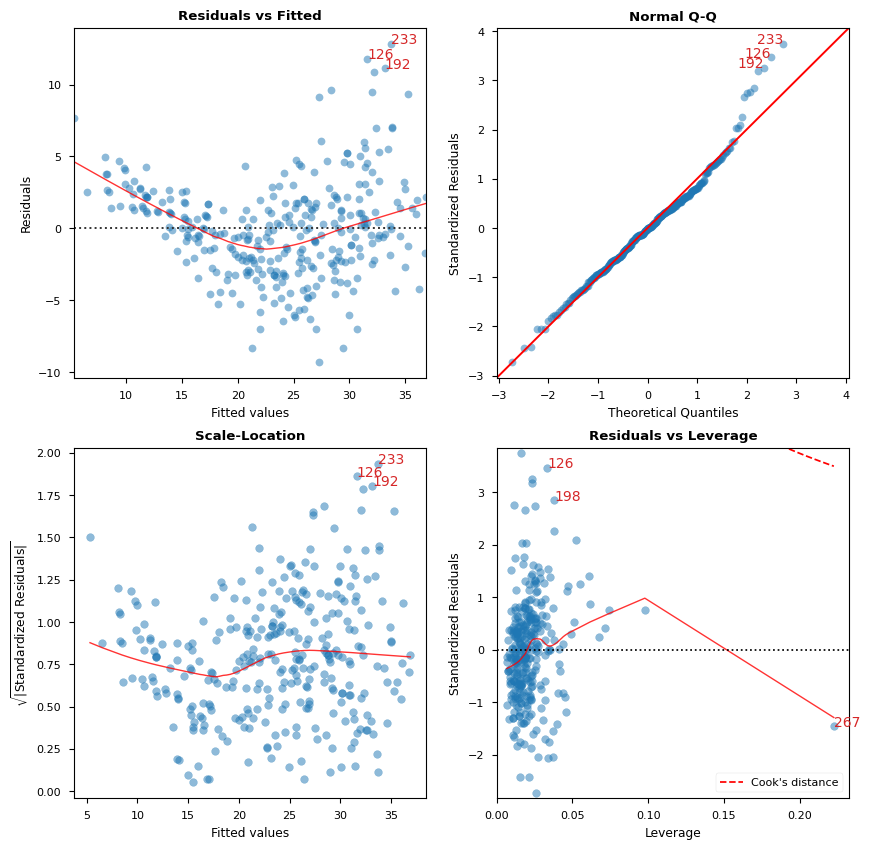

       Features  VIF Factor
5    model_year        1.26
6        origin        1.76
4  acceleration        2.43
2    horsepower        8.42
3        weight       10.03
1  displacement       11.58
0     Intercept      763.65


In [482]:
# Visualize the diagnostic plots
cls = LinearRegDiagnostic(model)
vif, fig, ax = cls()
print(vif)

Let's look at each plot one by one. First we will see the Residual vs Fitted values in order to identify non-linearity. If the assumption of linearity holds, the line should be approximately horizontal at zero. If the assumption of homoscedasticity (constant variance of residuals) holds, residuals should be randomly and evenly scattered around 0 line.

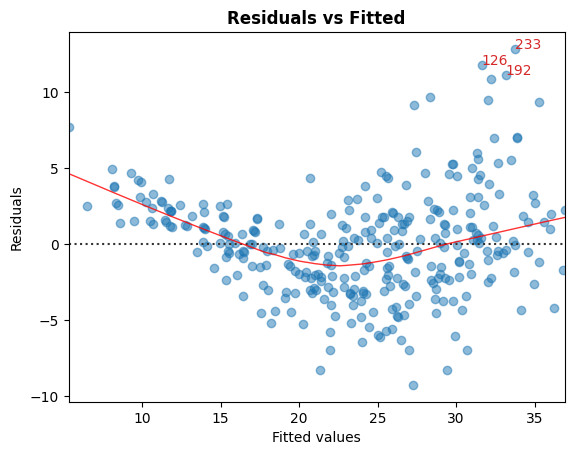

In [483]:
cls.residual_plot();

The curvature in the plot indicates a potential non-linearity in the model. Some residuals are further away from the 0 line, suggesting that the model does not fit these points as well as others. Points **126**, **233** and **192** are influential so we haveto investigate them to ensure they aren't errors or outliers. Exploring transformations, adding polynomial or interaction terms might help improve the fit.

Next we will look at Standarized Residual vs Theoretical Quantile plot, which will help us check if the residuals are normally distributed. For linear regression model to be valid, one of the assumptions is that the residuals (errors) are normally distributed. If they are perfectly normally distributed, the points will lie on the red diagonal line.

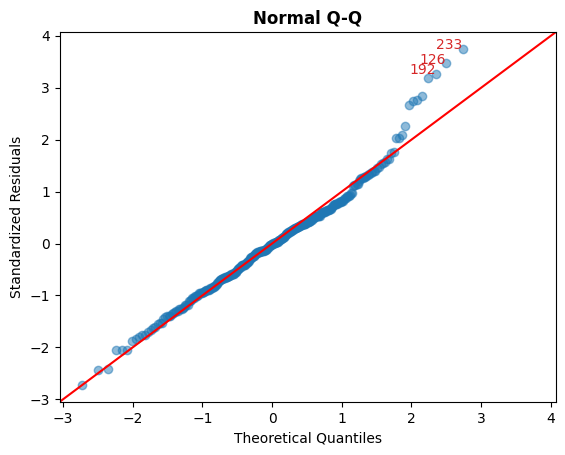

In [484]:
cls.qq_plot();

The deviation from the red line at the upper tail suggests the presence of outliers or hte residuals having a non-normal distribution in that region. Points like **126**, **233** and **192** are away from the line and might be influential observation, outliers or extreme values. We will investigate these points and consider transformations or other regression techniques to address the deviations from normality.

Next one is the Scale-Location plot, which is used to check homoscedasticity (constant variance) of the residuals. Linear regression assumes that variance of the residuals is constant across all levels of the independent variables. If the residuals have constant variance, the points should scatter randomly around a horizontal line.

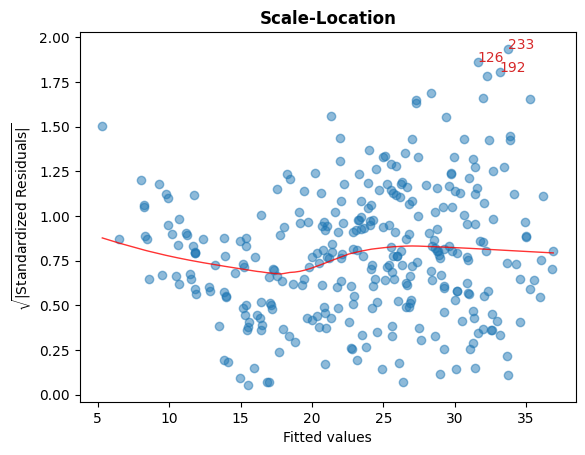

In [485]:
cls.scale_location_plot();

Most of the points are scattered around the red line, which is a good sign. However, the slight upward curve suggests that the residuals' variance might increase as the fitted values increase. Also, points like **126**, **233**, and **192** that are away from the bulk of the data might be influential observations or outliers. Again, it might be worth considering transformation or investigating potential outliers.

And the last plot is the Residuals vs Leverage plot, which help us find the influential observations (outside Cook's distance curves) that can unduly affect the fit of the regression model.

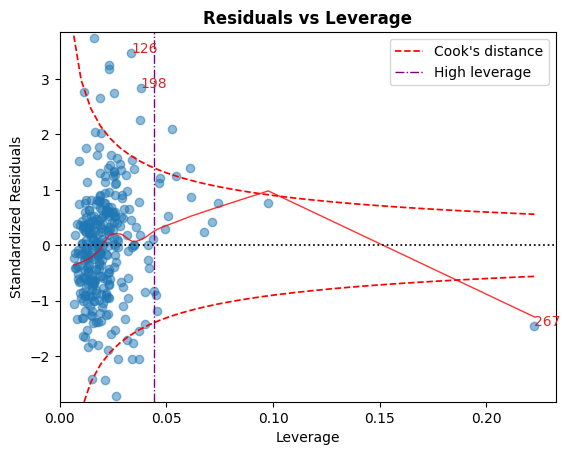

In [486]:
cls.leverage_plot(high_leverage_threshold=True, cooks_threshold='dof');

Most of the data points are clustered in the center of the plot, suggesting they have little influence on the regression line. Observations like **126** and **198** have high leverage as they are very close to the high leverage line, which means that they can potentially have a large influence on the regression model, especially if they also have large residuals, which is also the case here. The red Cook's distance gives an indication of the influence of the observations. Points like **126**, **198**, and **267** are beyond or close to this line, suggesting they are influential observations.

We can also look at the variance inflation factor (VIF), which is measured in multicollinearity.
1. VIF value of 1 indicates no multicollinearity.
2. VIF value between 1 and 5 is generally considered as moderate multicollinearity, but it's typically acceptable.
3. VIF value greater than 5 or 10 indicates high multicollinearity.

In [487]:
cls.vif_table()

,Features,VIF Factor
5,model_year,1.26
6,origin,1.76
4,acceleration,2.43
2,horsepower,8.42
3,weight,10.03
1,displacement,11.58
0,Intercept,763.65


the features **model_year**, **origin** and **acceleration** have low VIF factor, which suggests that they are generally acceptable and are not an issue for the predictor. Wile the other three features **horsepower**, **weight** and **displacement** have high VIF factor, which indicates that multicollinearity is present among the predictor variables. We can check pairwise correlations among the predictors with high VIF values to identify which variabels are highly correlated. If two or more are highly correlated, we will consider removing one or combining them into a single predictor.

We can see the correlation between the features by providing a pair plot, which is a visual representation of pairwise relationships in the dataset. Diagonal histograms represent the distribution of a single variable. Scatter plots show pairwise relationship between two variables. We will show the pair plot on the whole dataset (features and target variable).

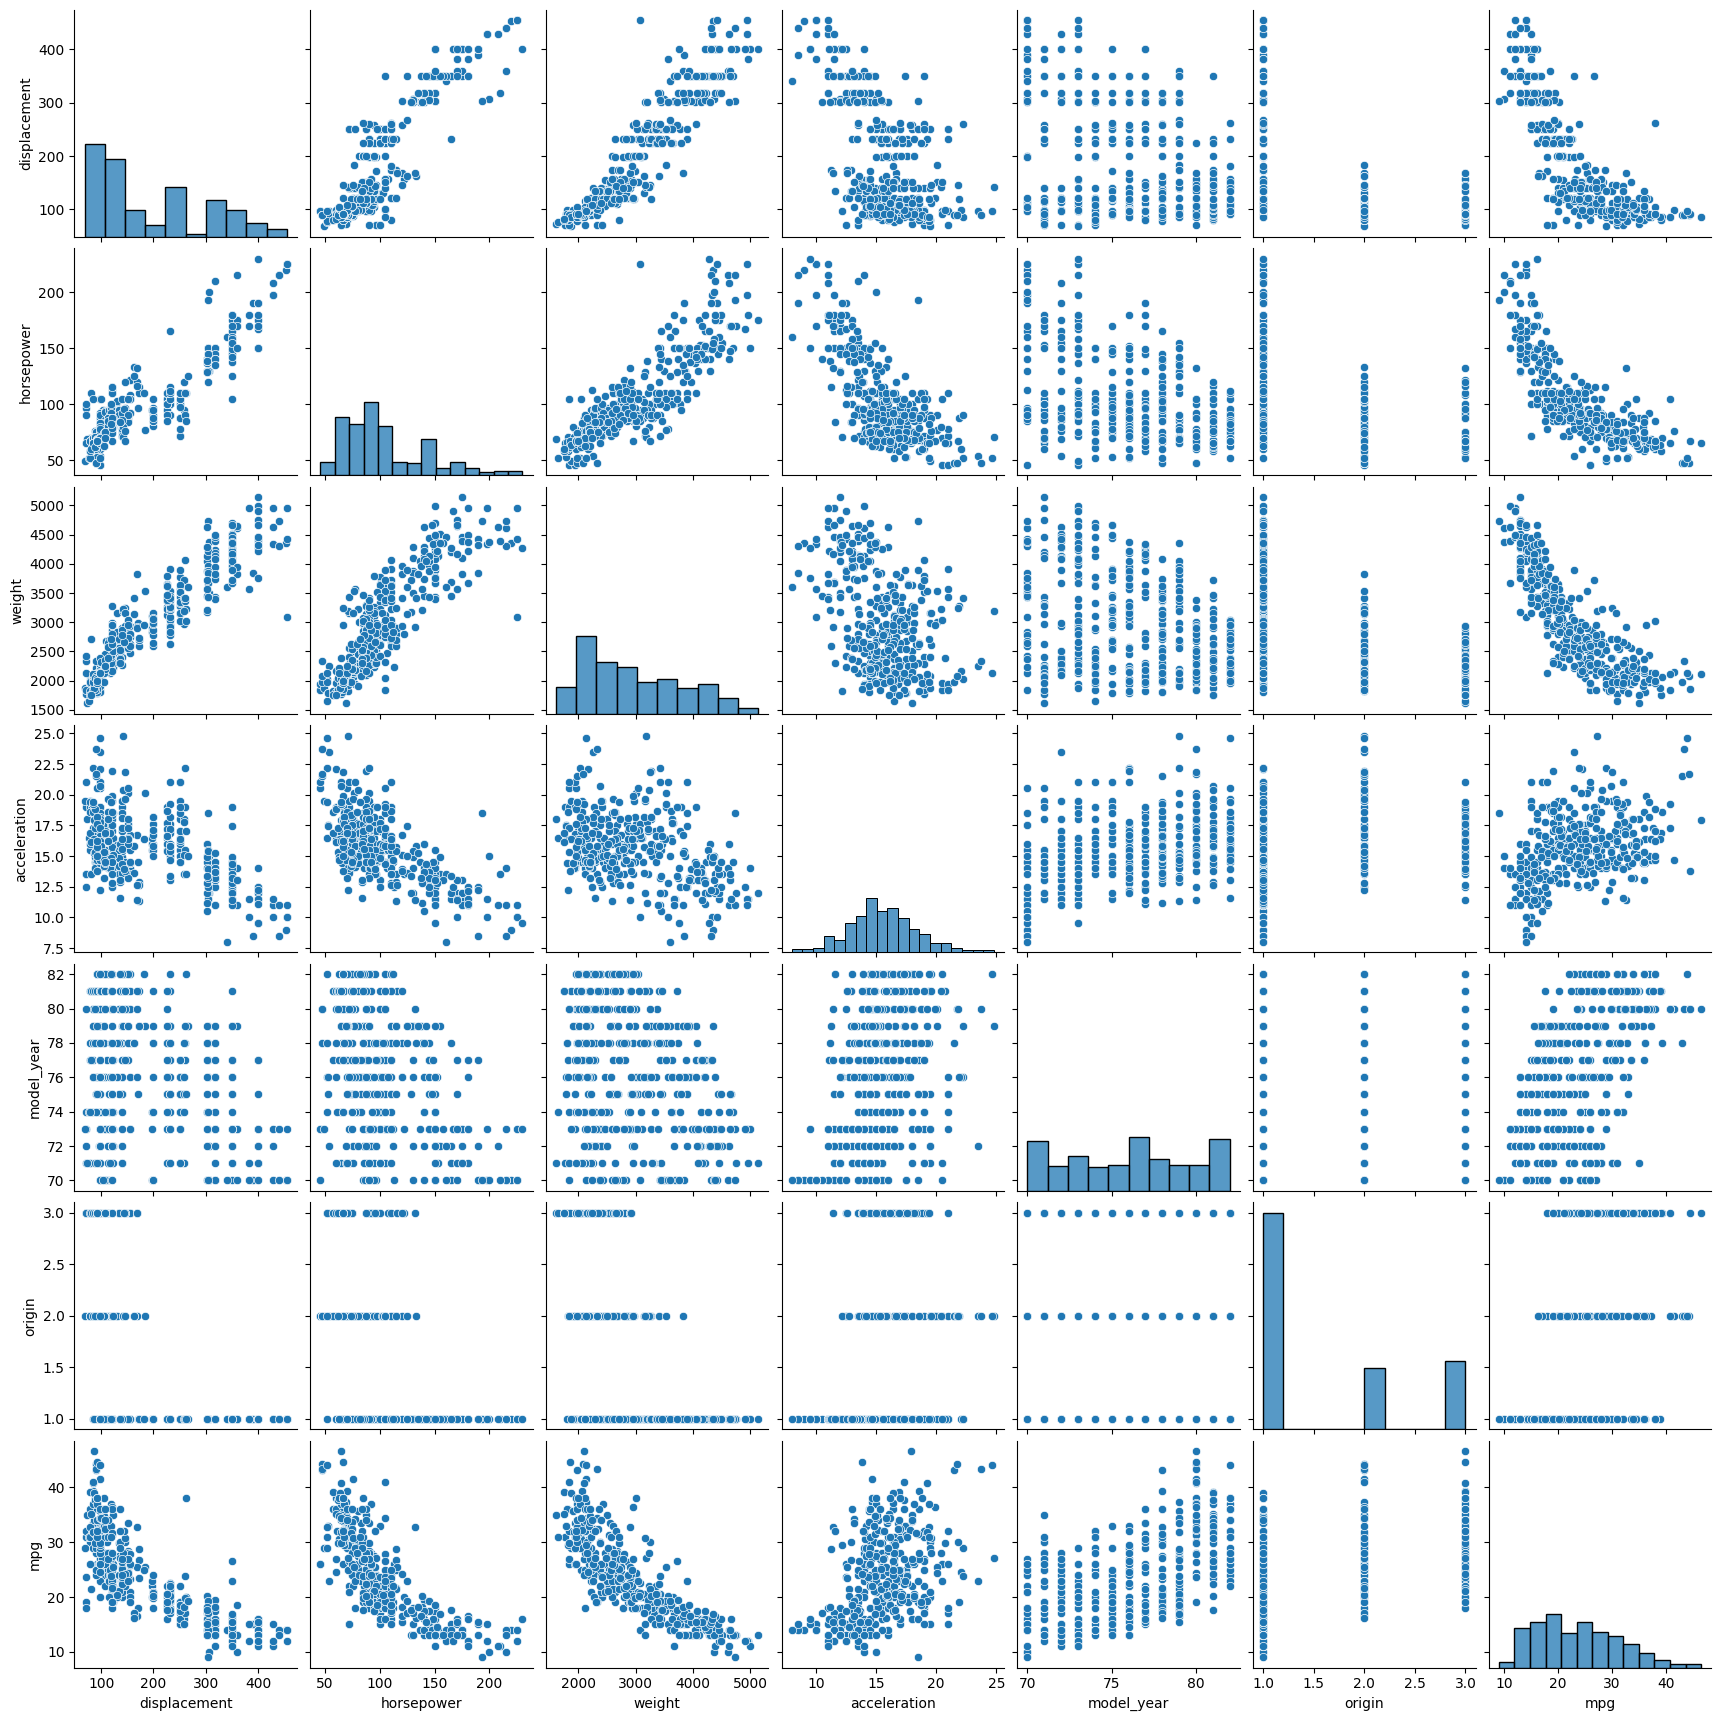

In [488]:
import seaborn as sns

labeled_dataset = pd.concat([X, y], axis=1)
sns.pairplot(labeled_dataset);

From the plots we can conclude that:
1. The attributes **displacement**, **horsepower**, and **weight** have right-skewed distributions and are positively correlated with each other. Given the multicollinearity we might consider using only one of these variables, transforming the data, or use dimensionality reduction techniques like PCA.
2. The attribute **acceleration** appears to have roughly normal distribution, but has negative correlations with displacement, horsepower, and weight. Given its different behavior and distribution, it might provide unique information to the model. We can also see some outliers especially for this feature.
3. The attribute **model_year** shows us that some specific years have more observations and its relationship with other variables doesn't indicate a linear trend. We will consider using it as categorical variable or encode it differently.
4. Also for the attributer **origin** we can see that its relationship with others doesn't indicate linear trend.
5. The target variable **mpg** seems to also have right-skewed distribution so we can try and transform the data. Features like **displacement**, **horsepower** and **weight** have negative relationship with the target value. This means that when these values increase the target value tends to decrease. The **model_year** seems to have slightly positive linear relationship with the target value and **acceleration** has a scattered pattern, indicating a weaker or potentially nonlinear realation with the target value.


## Model improvement

Now we will try to improve the model by transforming target variable or removing some attributes/instances based on the diagnostics.

First thing we can do is logaritmically tranform the targer variable **mpg**, since its values span a wide range and this way we can make its distribution more normal.

In [489]:
import numpy as np
y['mpg'] = np.log(y['mpg'])

<ipython-input-489-038fc2da165f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['mpg'] = np.log(y['mpg'])


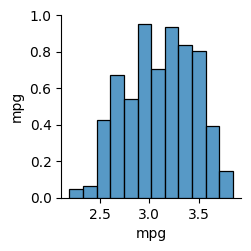

In [490]:
sns.pairplot(y);

We can see that this made the distribution a lot more normal then before. Now let's try to fix the distribution of the variables **weight**, **horsepower** and **displacement**

In [491]:
X['displacement'] = np.log(X['displacement'])
X['weight'] = np.log(X['weight'])
X['horsepower'] = np.log(X['horsepower'])

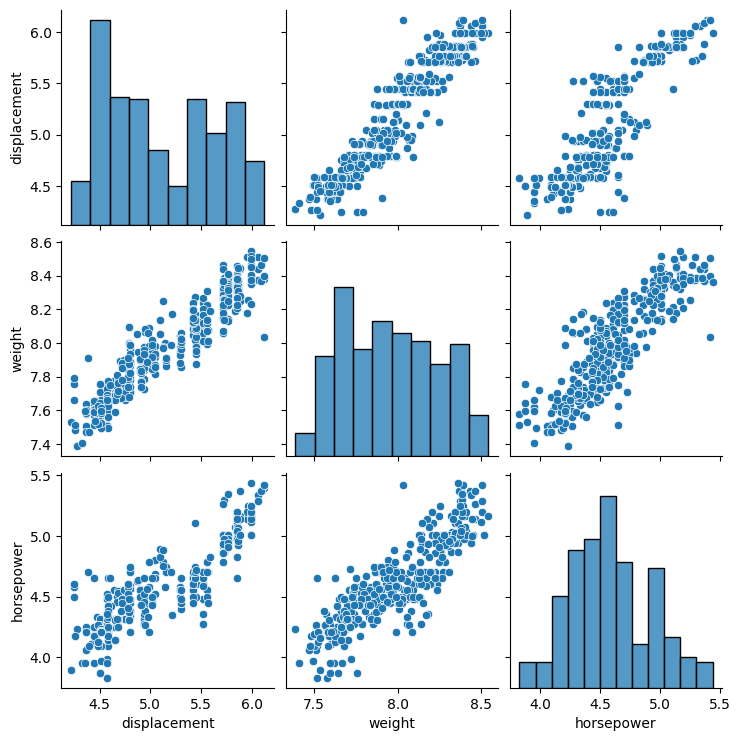

In [492]:
sns.pairplot(X[['displacement', 'weight', 'horsepower']]);

We can see that the distributions are much better now. While we are at these 3 attributes let's handle the multicollinearity. By doing some analysis using the diagnostic and VIF scores by removing different attributes from these 3, we found out that the attribute weight has big influence and has to stay. By removing the attribute horsepower we remove the multicollinearity between it and acceleration and by removing the attribute displacement we also remove the multicollinarity between it and weight.

In [493]:
X = X.drop(['displacement', 'horsepower'], axis=1)

X.head()

,weight,acceleration,model_year,origin
0,8.161660,12.0,70,1
1,8.214194,11.5,70,1
2,8.142063,11.0,70,1
3,8.141190,12.0,70,1
4,8.145840,10.5,70,1


Since the attribute **origin** is categorical it's best to convert it.

In [494]:
X['origin'].unique()

array([1, 3, 2])

Since we have values 1,2, and 3 we will create two new columns. The first will be 1 if the origin is 1 nad 0 otherwise. The second would be 1 if the origin is 1 and 0 otherwise. This means that 1 will be 10, 2 will be 01 and 3 will be 00.

In [495]:
X.head()

,weight,acceleration,model_year,origin
0,8.161660,12.0,70,1
1,8.214194,11.5,70,1
2,8.142063,11.0,70,1
3,8.141190,12.0,70,1
4,8.145840,10.5,70,1


In [496]:
# Convert the 'origin' column to one-hot encoded columns
X['origin_1'] = (X['origin'] == 1).astype(int)
X['origin_2'] = (X['origin'] == 2).astype(int)
X = X.drop('origin', axis=1)

In [497]:
X.head()

,weight,acceleration,model_year,origin_1,origin_2
0,8.161660,12.0,70,1,0
1,8.214194,11.5,70,1,0
2,8.142063,11.0,70,1,0
3,8.141190,12.0,70,1,0
4,8.145840,10.5,70,1,0


In [498]:
X['origin_1'].unique()

array([1, 0])

In [499]:
X['origin_2'].unique()

array([0, 1])

Now let's run the diagnostics on the new dataset to see if there is an improvement.

In [500]:
labeled_data = pd.concat([X, y], axis=1)
labeled_data.head()

,weight,acceleration,model_year,origin_1,origin_2,mpg
0,8.161660,12.0,70,1,0,2.890372
1,8.214194,11.5,70,1,0,2.708050
2,8.142063,11.0,70,1,0,2.890372
3,8.141190,12.0,70,1,0,2.772589
4,8.145840,10.5,70,1,0,2.833213


In [501]:
model_improved = smf.ols(formula="mpg ~ weight + acceleration + model_year + origin_1 + origin_2", data=labeled_data).fit()
model_improved.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     609.5
Date:                Wed, 25 Oct 2023   Prob (F-statistic):          2.36e-182
Time:                        12:27:58   Log-Likelihood:                 297.72
No. Observations:                 398   AIC:                            -583.4
Df Residuals:                     392   BIC:                            -559.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        7.5216      0.281     26.808      0.000       6.970       8.073
weight          -0.8737      0.028    -30.712      0.000      -0.930      -0.818
acceleration     0.0044      0.002      1.880      0.061      -0.000       0.009
model_year       0.0326      0.002     19.354      0.000       0.029       0.036
origin_1        -0.0329      0.018     -1.805      0.072      -0.069       0.003
origin_2         0.0240      0.019      1.241      0.216      -0.014       0.062
==============================================================================
Omnibus:                        7.330   Durbin-Watson:                   1.400
Prob(Omnibus):                  0.026   Jarque-Bera (JB):                9.856
Skew:                          -0.144   Prob(JB):                      0.00724
Kurtosis:                       3.715   Cond. No.                     3.81e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.81e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

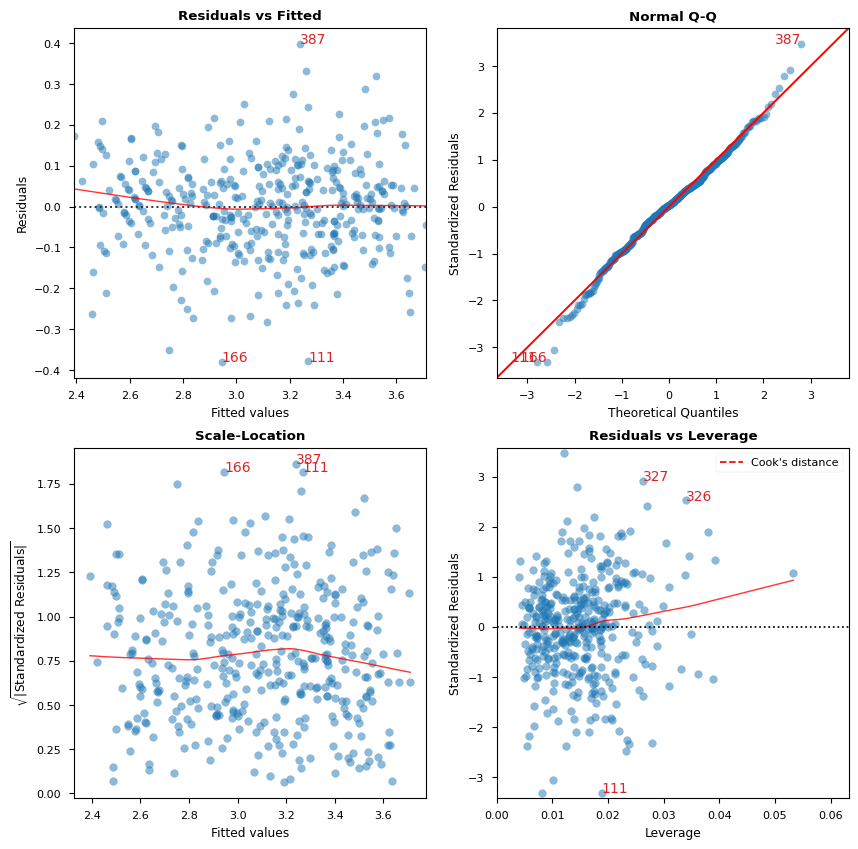

       Features  VIF Factor
3    model_year        1.16
2  acceleration        1.27
5      origin_2        1.62
1        weight        1.90
4      origin_1        2.33
0     Intercept     2352.88


In [502]:
cls_improved = LinearRegDiagnostic(model_improved)
vif_improved, fig_improved, ax_improved = cls_improved()
print(vif_improved)

We can see that the **VIF Factor** for every attribute is now pretty good and we have improvement in the plots.

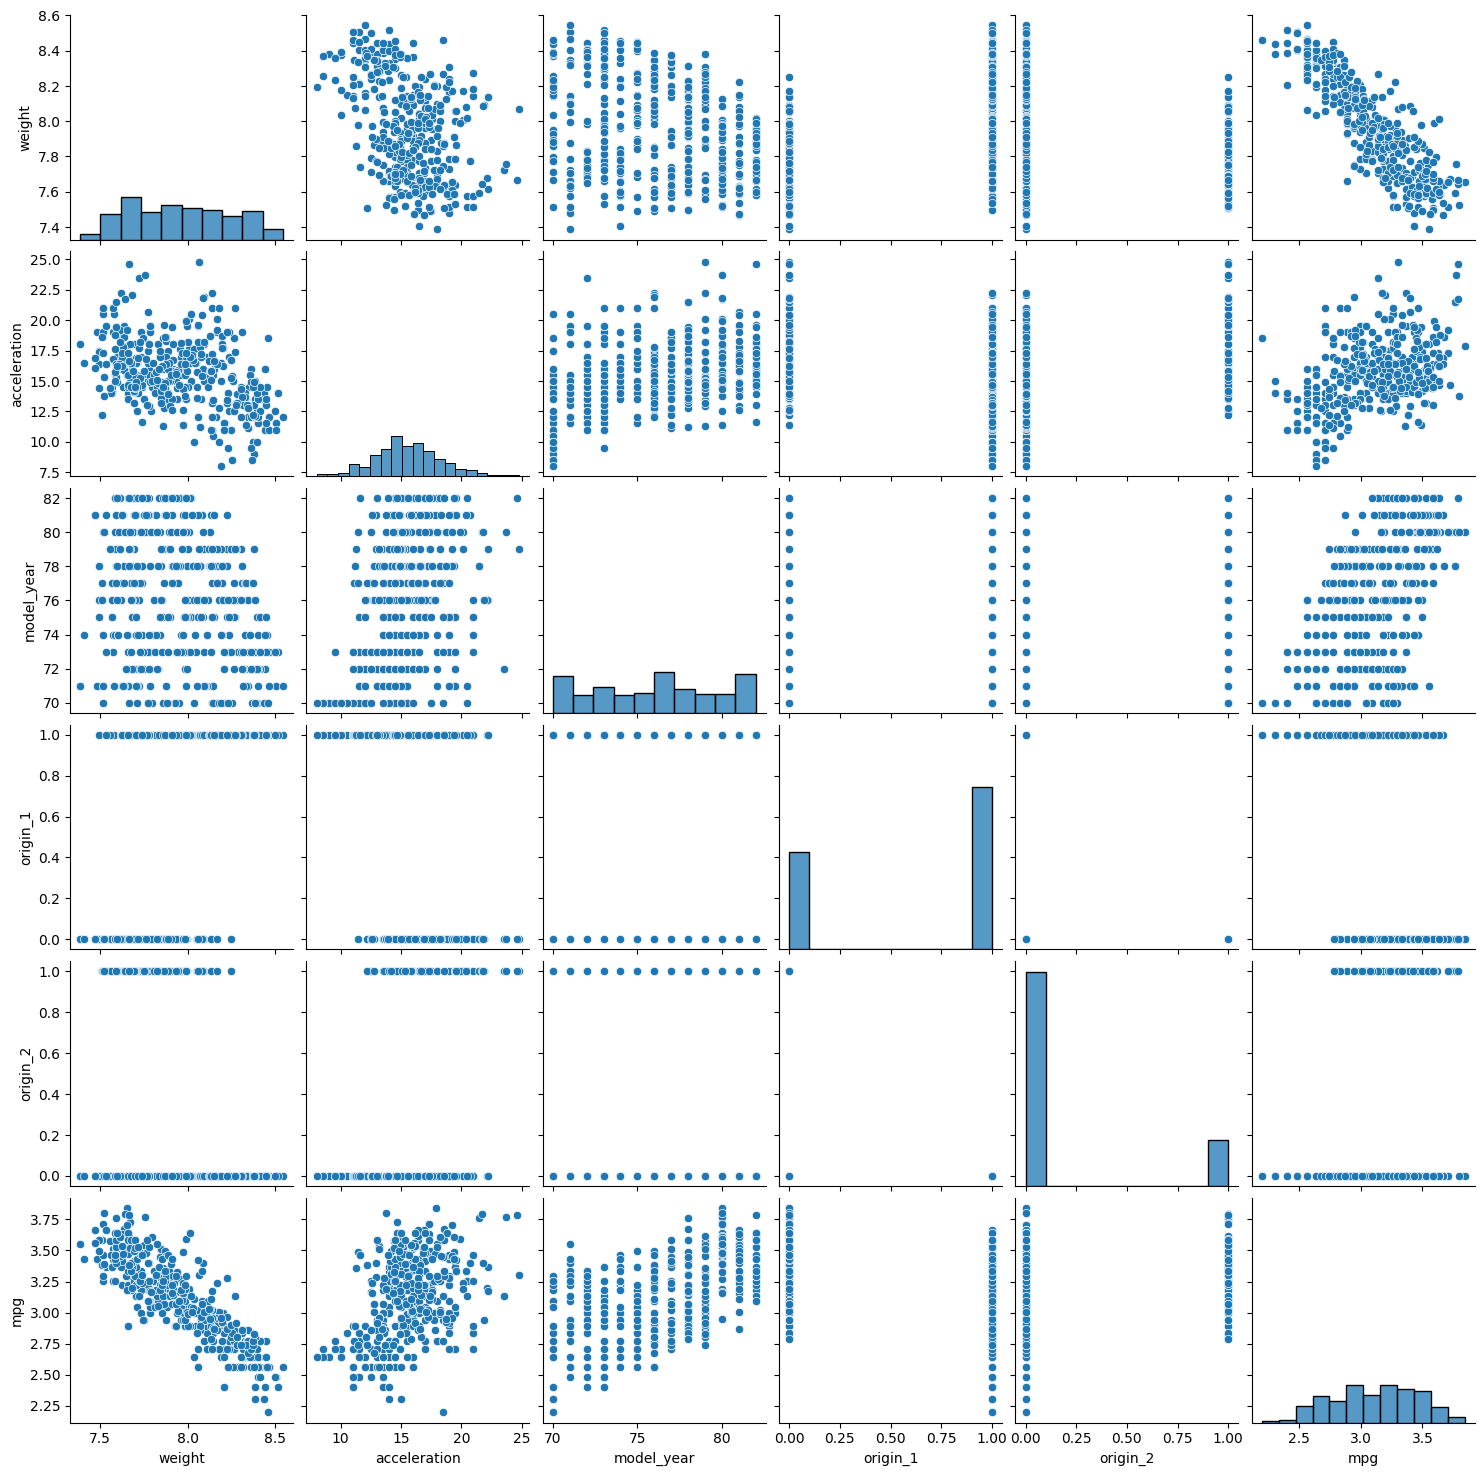

In [503]:
sns.pairplot(labeled_data);

We can see that now also the distribution and relationships between attributes are better. So it's time to evaluate the model using our evaluation metrics

In [504]:
# Split the data into train and test using the SciKit-learn library
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("---Features sizes---")
print(f"Splitted data: ({len(X_train)}, {len(X_test)})")
print("Whole data: ", len(X))
print("---Labels sizes---")
print(f"Splitted data: ({len(y_train)}, {len(y_test)})")
print("Whole data:", len(y))

---Features sizes---
Splitted data: (318, 80)
Whole data:  398
---Labels sizes---
Splitted data: (318, 80)
Whole data: 398


In [505]:
custom_regression_improved = CustomLinearRegression()
custom_regression_improved.fit(X_train, y_train)
y_pred_improved = custom_regression_improved.predict(X_test)
mse_improved, mae_improved, rse_improved, r2_score_improved = custom_regression_improved.evaluation(y_test["mpg"].values, y_pred_improved)

Linear Regression Evaluation Results:
Mean Squared Error (MSE):  0.011997706837580219
Mean Absolute Error (MAE):  0.08073922578042862
Residual Standard Error (RSE):  0.10953404419439748
R-Squared Score (R^2):  0.8893278086868192


In [506]:
regression_sklearn_improved = LinearRegression()
regression_sklearn_improved.fit(X_train, y_train)
y_pred_sklearn_improved = regression_sklearn_improved.predict(X_test).reshape(-1)
mse_sklearn_improved, mae_sklearn_improved, rse_sklearn_improved, r2_score_sklearn_improved = custom_regression_improved.evaluation(y_test["mpg"].values, y_pred_sklearn_improved)

Linear Regression Evaluation Results:
Mean Squared Error (MSE):  0.011997706837583447
Mean Absolute Error (MAE):  0.08073922578048556
Residual Standard Error (RSE):  0.1095340441944122
R-Squared Score (R^2):  0.8893278086867893


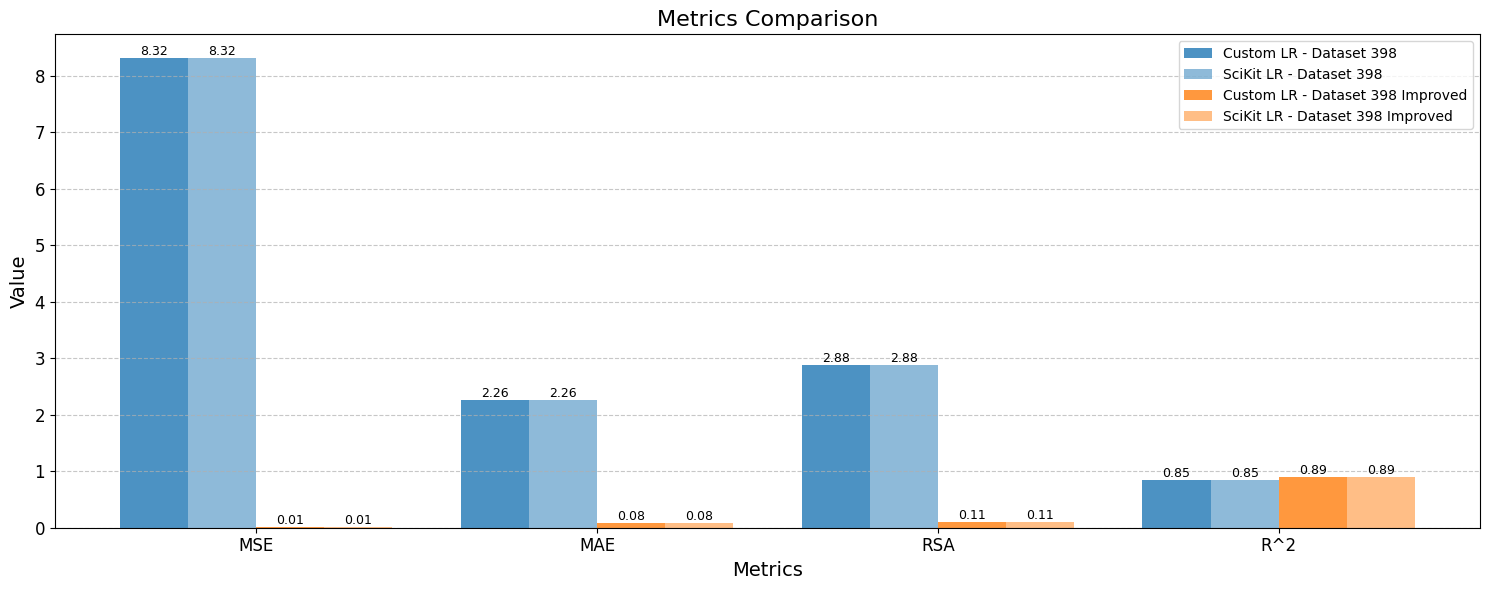

In [507]:
%matplotlib inline
import matplotlib.pyplot as plt

# Create arrays for each metric
MSE = np.array([mse, mse_sklearn, mse_improved, mse_sklearn_improved])
MAE = np.array([mae, mae_sklearn, mae_improved, mae_sklearn_improved])
RSE = np.array([rse, rse_sklearn, rse_improved, rse_sklearn_improved])
R2_SCORE = np.array([r2_score, r2_score_sklearn, r2_score_improved, r2_score_sklearn_improved])
metrics = [MSE, MAE, RSE, R2_SCORE]

# Plot the figure
plt.figure(figsize=(15, 6))

# Model and dataset names
datasets = ['Dataset 398', 'Dataset 398 Improved']
models = ['Custom LR', 'SciKit LR']
metric_names=['MSE', 'MAE', 'RSA', 'R^2']

# Define legend labels
colors = ['#1f77b4', '#1f77b4', '#ff7f0e', '#ff7f0e']
alphas = [0.8, 0.5, 0.8, 0.5]
labels = [f"{model} - {dataset}" for dataset in datasets for model in models]

# Define positions and spacing
bar_width = 0.2
spacing = 0.6
index = np.arange(len(metrics))

# Iterate over the metrics
for i, metric in enumerate(metrics):
    for j, value in enumerate(metric):
        bar = plt.bar(index[i] + j*bar_width,
                value,
                bar_width,
                color=colors[j],
                label=labels[j] if i == 0 else "",
                alpha=alphas[j])
        height = bar[0].get_height()
        plt.text(bar[0].get_x() + bar[0].get_width()/2,
                 height,
                 f"{value:.2f}",
                 ha='center',
                 va='bottom',
                 fontsize=9)


# Adjustments to the plot
plt.xlabel('Metrics', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.title('Metrics Comparison', fontsize=16)
plt.xticks(index + 1.5*bar_width, metric_names, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='upper right', fontsize=10)
plt.tight_layout()
plt.show()

As we can see, these changes really improved our model by drastically dicresing MSE, MAE and by increasing the R2 score.